In [3]:
import sys
import os
import numpy as np

project_path = r"C:\Users\benja\Documents\Git projects\Multilayer-magnons---Dynamic-matrix-calculations"

if project_path not in sys.path:
    sys.path.append(project_path)

import multilayer_dispersion as md
from multilayer_dispersion import MagneticFilm, MagneticTensor, Dispersion, μ0, Graphs

In [ ]:
mu0 = μ0

film = MagneticFilm(number_of_layers=8, total_thickness = 20e-9)
fp = film.magnetic_parameters

# to change some propertie along layers film.magnetic_parameters.define_interaction("phi", lambda eta: -np.pi/2)
# to change interlayer interaction film.magnetic_parameters.define_interlayer_interaction("J", array)

# d1 = 5nm, spacer = .7, d2 =  20 nm
fp.xi_array = np.array([1.25e-9, 3.75*1e-9, (3.75+.95+2.5*1)*1e-9,  (3.75+.95+2.5*2)*1e-9, (3.75+.95+2.5*3)*1e-9, (3.75+.95+2.5*4)*1e-9, (3.75+.95+2.5*5)*1e-9, (3.75+.95+2.5*6)*1e-9])

# Ms is the same on all layers
fp.define_funct("Ms", lambda eta: 7.4e5)

# RKKY between layers is -3e-5 J/m2
fp.J_array[1,2] = fp.J_array[2,1] = -79.4e-6

# magnetization is in-plane
fp.define_funct("th", lambda eta: np.pi/2)


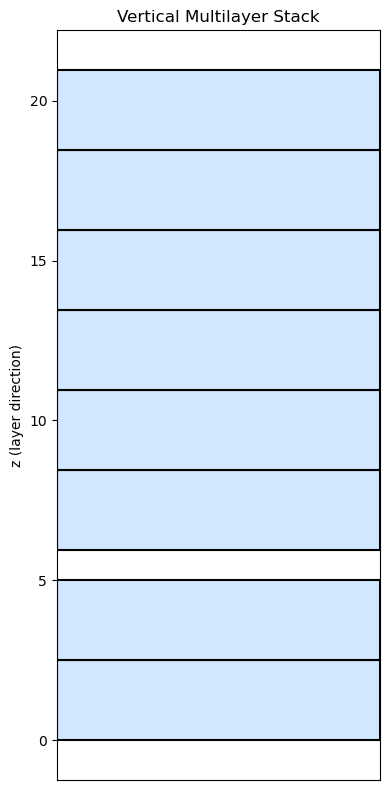

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_multilayers_vertical(xi_array, d, layer_color="#d0e7ff"):
    """
    Plot a multilayer system where each layer is vertical in ordering:
    Layers are stacked along the y-axis (vertical).
    Each layer spans y ∈ [xi[i] - d/2, xi[i] + d/2].
    All layers share the same color.
    Horizontal boundaries are drawn in black.
    """

    fig, ax = plt.subplots(figsize=(4, 8))

    for xi in xi_array:
        y0 = xi - d/2      # bottom of the layer
        rect = Rectangle((0, y0), 1, d,
                         facecolor=layer_color,
                         edgecolor="black",
                         linewidth=1.5)
        ax.add_patch(rect)

    # Plot settings
    ax.set_xlim(0, 1)
    ax.set_ylim(min(xi_array) - d, max(xi_array) + d)
    ax.set_xticks([])
    ax.set_ylabel("z (layer direction)")
    ax.set_title("Vertical Multilayer Stack")

    plt.tight_layout()
    plt.show()


# Example
xi_array = fp.xi_array*1e9
d = 2.5
plot_multilayers_vertical(xi_array, d)



In [3]:
data = np.load("rkky-3e-5_data.npz")

H_vals = data["H_vals"]
psi1_vals = data["psi1_vals"]
psi2_vals = data["psi2_vals"]


wH_vals = []
H_clean = []
for i in range(len(H_vals)):
    H = H_vals[i]
    psi_down = psi1_vals[i]
    psi_up = psi2_vals[i]

    fp.phi_array = np.array([psi_down, psi_down, psi_up, psi_up, psi_up, psi_up, psi_up, psi_up, psi_up, psi_up])
    dispersion = Dispersion(film)

    k0 = np.array([0.0001])
    phi_H = np.pi/2
    w_vals, v_vals = dispersion.w_vect(k0, H, np.pi/2, 0)
    if len(w_vals.flatten()) != 10:
        print("Error: on value H =", 1e3*H*mu0, 'mT')
        continue
    wH_vals.append(w_vals.flatten())
    H_clean.append(H)
wH_vals = np.array(wH_vals)
H_vals = np.array(H_clean)

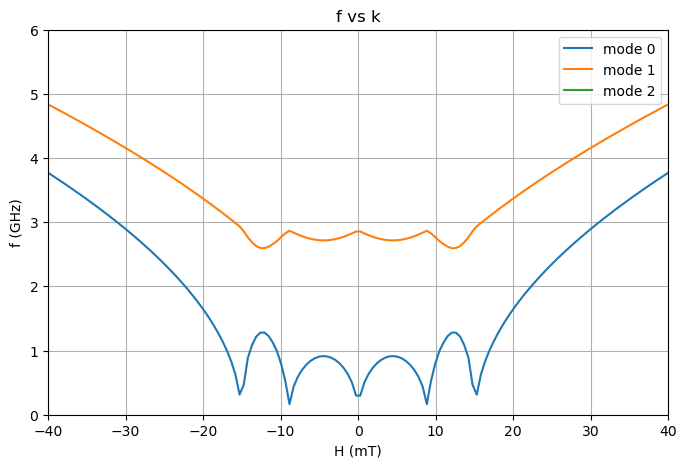

In [4]:
graphs = Graphs()
orbit_parameters = [10,0]
graphs.graph(H_vals*μ0*1e3, [wH_vals], modes = [0,1,2], xlim = [-40,40], ylim = [0,6], x_label='H (mT)')# , v_k_mode = orbit_parameters)

In [5]:
dispersion = Dispersion(film)

k_vals = np.arange(-100,100,np.pi)
w_vals, v_vals = dispersion.w_vect(k_vals, .5/mu0, np.pi/2, 0* np.pi/2)

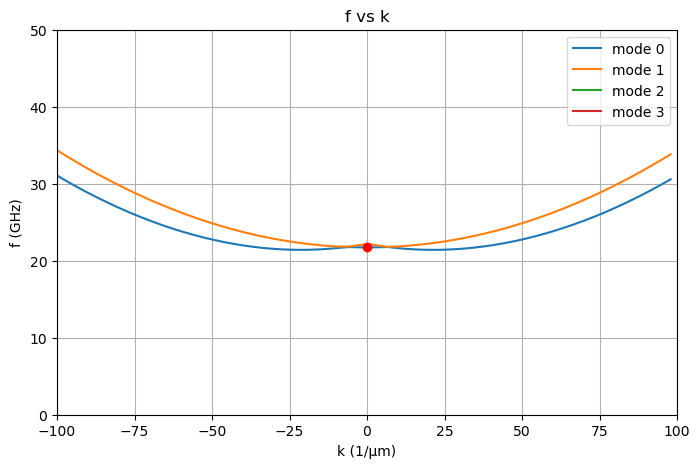

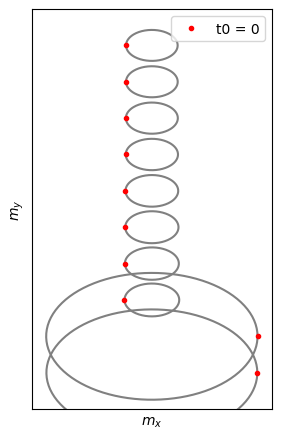

In [6]:
graphs = Graphs()
orbit_parameters = [0,0]
graphs.dispersion(k_vals, [w_vals], modes = [0,1,2,3], xlim=[-100,100], ylim = [0,50],  v_k_mode = orbit_parameters)
graphs.orbits(*orbit_parameters,v_vals, t0 = 0)